In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, adjusted_rand_score
from sklearn.decomposition import PCA
import pylab as pl

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

aps = pd.concat([train, test])
aps = aps.dropna()
X = aps.drop(columns=['class'])
y = np.array(aps['class'].map({'pos': 1, 'neg':0}))

In [3]:
aps['class'].map({'pos': 1, 'neg':0}).value_counts()

0    319
1     55
Name: class, dtype: int64

In [4]:
# Scaling data

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

/home/francisconeves/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/francisconeves/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [5]:
pca = PCA(0.95).fit(X)
X_pca = pca.transform(X)
X_pca.shape[1]
X = X_pca

In [6]:
def kMeans(X, n_clusters=2):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    
    predicted = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    return predicted, labels

predicted, labels = kMeans(X, 2)


In [7]:
adjusted_rand_score(y, predicted)

0.249415802392704

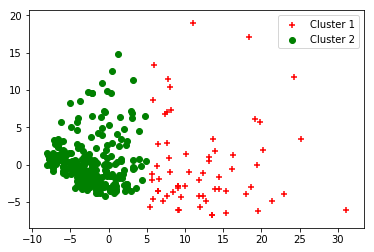

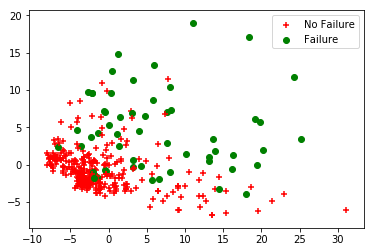

In [8]:
for i in range(0, X_pca.shape[0]):
    if predicted[i] == 0:
        c1 = pl.scatter(X_pca[i,0], X_pca[i,1], c='r', marker="+")
    elif predicted[i] == 1:
        c2 = pl.scatter(X_pca[i,0], X_pca[i,1], c='g', marker="o")
    elif predicted[i] == 2:
        c3 = pl.scatter(X_pca[i,0], X_pca[i,1], c='b', marker="*")
        
pl.legend([c1, c2], ['Cluster 1', 'Cluster 2'])
pl.show()

for i in range(0, X_pca.shape[0]):
    if y[i] == 0:
        c1 = pl.scatter(X_pca[i,0], X_pca[i,1], c='r', marker="+")
    elif y[i] == 1:
        c2 = pl.scatter(X_pca[i,0], X_pca[i,1], c='g', marker="o")
        
pl.legend([c1, c2], ['No Failure', 'Failure'])
pl.show()